<a href="https://colab.research.google.com/github/ffviana/NUTRECON/blob/main/FractalPairing_Pilot/Data%20Acquisition/Colab%20Notebooks/TestEval_ExpRoom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pickle
import json
import numpy as np
import pandas as pd
from glob import glob
from random import shuffle

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

base_folder = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/1. DataAcquisition/ExperimentsRoom'
subjectFigures_folder = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/3. Analyses/Subject_by_Subject_plots'

sequenceFolder = base_folder + '/SitmulusPresentationSequence'
AssTestFolder = base_folder + '/AssociationTask_ExperimentsRoom'

fractalDecoder = {0: 'Fractal I',
                  1: 'Fractal II',
                  2: 'Fractal III',
                  3: 'Fractal IV',
                  4: 'Fractal V',
                  5: 'Fractal VI'
                  }

def bold(text):
  return '\033[1m' + text + '\033[0m'

def printFiles(sequenceFolder, AssTestFolder, Subject_code):
  path_sequence_ = glob('{}/{}*.npy'.format(sequenceFolder, Subject_code) )
  path_AssTest_ = glob('{}/{}*'.format(AssTestFolder, Subject_code) )
  sequence_files = [p.split('/')[-1] for p in path_sequence_]
  AssTest_files = [p.split('/')[-1] for p in path_AssTest_ if not 'misClicks' in p]

  print(bold('Sequence Files for subject {}:'.format(Subject_code)))
  for p in sequence_files:
    print('\t- {}'.format(p))
    
  print('\n')
  print(bold('Association Test Files for subject {}:'.format(Subject_code)))
  for p in AssTest_files:
    print('\t- {}'.format(p))
  
  return

def reportAndConfusionMatrix(Sequence, Answers, flavorFractal_code = False):

  targetNames = [fractalDecoder[p] for p in list(set(Sequence + Answers))]

  report = classification_report(Sequence, Answers, 
              target_names = targetNames, zero_division = 0, output_dict = True)
  print('\t\t\t\033[1mAccuracy:\033[0m {}'.format(report['accuracy']))

  #classification_report(Sequence, Answers, target_names = targetNames, zero_division = 0, output_dict = True)

  #print(classification_report(Sequence, Answers, target_names = targetNames, 
  #      zero_division = 0).replace('precision','True Neg.')
  #     .replace('recall','sensitivity')
  #     .replace('support','Trials')
  #     .split('macro')[0])
  
  fractal_labels = fractalDecoder.values()
  flavor_labels = [flavorFractal_code[p] for p in fractal_labels]

  fig, ax = plt.subplots(figsize=(5.5, 5.5), dpi=90)
  mat = confusion_matrix(Sequence, Answers, labels = np.arange(6))
  Zm = np.identity(len(mat))
  sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, ax = ax)
  ax2 = ax.pcolor(Zm, facecolor='none', linewidth=4, edgecolor = 'blue')

  ax.tick_params( direction = 'inout' )
  ax.set_xlabel('Correct Factal')
  ax.set_ylabel('Subject Choice')
  ax.set_yticklabels(list(fractalDecoder.values()), rotation=0);
  ax.set_xticklabels(list(fractalDecoder.values()), rotation=30, ha='right');
  
  flavors = [flavorFractal_code[p] for p in list(fractalDecoder.values())]
  
  ax_t = ax.secondary_xaxis('top')
  ax_t.tick_params(axis='x', direction='inout')
  ax_t.set_xticks(ax.get_xticks())
  ax_t.set_xticklabels(flavors, rotation=30, ha='left');

  ax_r = ax.secondary_yaxis('right')
  ax_r.tick_params(axis='y', direction='inout')
  ax_r.set_yticks(ax.get_yticks())
  ax_r.set_yticklabels(flavors, rotation=0);

  return fig

def updateSubjectFile_Registery(sub_id, section, fname):

  registery_fname = '/content/drive/MyDrive/Food Reward and Behaviour/Humans/Projects/2. NUTRECON/FlavorFractal optimization/2. Databases/subjectFiles_registration.json'
  
  # Read Registery
  with open(registery_fname) as json_file:
    registery = json.load(json_file)

  # Update Subject Registery
  subject_registery = registery.get(sub_id)
  if subject_registery == None:
    subject_registery = {}

  if section in subject_registery.keys() and subject_registery[section] != fname:
    print('File \033[1m{}\033[0m already exists for subject \033[1m{}\033[0m.'.format(section.upper(), sub_id.upper()))
    print('Changing from:')
    print('\t{} -> {}'.format(section, subject_registery[section]))
    print('To:')
    print('\t{} -> {}'.format(section, fname))

    p = 1
    while p == 1:
      ans = input('\nDo you wish to overwrite the registery? (yes[y]/no[n]) ')
      if ans.lower() == 'no' or ans.lower() == 'n':
        p = 0
        file = subject_registery[section]
      elif ans.lower() == 'yes' or ans.lower() == 'y':
        subject_registery.update({section:fname})
        file = fname

#        # Update & save Registery
#        registery.update({sub_id:subject_registery})
#        with open(registery_fname, "w") as json_file:
#          json.dump(registery, json_file)
        p = 0
      else:
        print('Please type a valid answer.')
  else:
    subject_registery.update({section:fname})
    file = fname

  # Update & save Registery
  registery.update({sub_id:subject_registery})
  with open(registery_fname, "w") as json_file:
    json.dump(registery, json_file)
  print()

  return file

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Enter Subject number

In [ ]:
Subject_number = 21  # CHANGE HERE

# ==============================================================================

Subject_code = 'ercffa_{:03d}'.format(Subject_number)

printFiles(sequenceFolder, AssTestFolder, Subject_code)


Sequence Files for subject ercffa_021:
	- ercffa_021_11-07-2022_08-18.npy


Association Test Files for subject ercffa_021:
	- ercffa_021_11-07-2022_09-17.json
	- ercffa_021_11-07-2022_11-13.json


## Define Sequence File name

In [ ]:
Sequence_File = 'ercffa_021_11-07-2022_08-18.npy' #Change Here

#===============================================================================

Sequence_File = updateSubjectFile_Registery(Subject_code, 'sequence', Sequence_File)
Sequence_Data = np.load('{}/{}'.format(sequenceFolder, Sequence_File), 
                        allow_pickle=True).item()

## Check Presentation Order


In [ ]:
Sequence_Data['Learning Order']

,Fractal,Flavor_code,Flavor
Order,,,
1,VI,b,Black Currant
2,I,d,Lychee
3,II,f,Tamarind
4,IV,e,Pomegranate
5,V,a,Apple Cider
6,III,c,Cashew


## Check Association Test 3 Order

In [ ]:
Sequence_Data['Association Test 3']

,Flavor_code,Flavor,fractal
Order,,,
1,b,Black Currant,3
2,d,Lychee,2
3,d,Lychee,2
4,b,Black Currant,3
5,c,Cashew,0
6,a,Apple Cider,1
7,b,Black Currant,3
8,f,Tamarind,4
9,a,Apple Cider,1


### For Ass. 3 sequence, run before this section

***

# Association Test Evaluation

## Association Test 1

In [ ]:
printFiles(sequenceFolder, AssTestFolder, Subject_code)

Sequence Files for subject ercffa_022:
	- ercffa_022_12-07-2022_09-41.npy


Association Test Files for subject ercffa_022:
	- ercffa_022_12-07-2022_11-37.json
	- ercffa_022_12-07-2022_12-40.json
	- ercffa_022_13-07-2022_09-46.json




			Accuracy: 0.5555555555555556


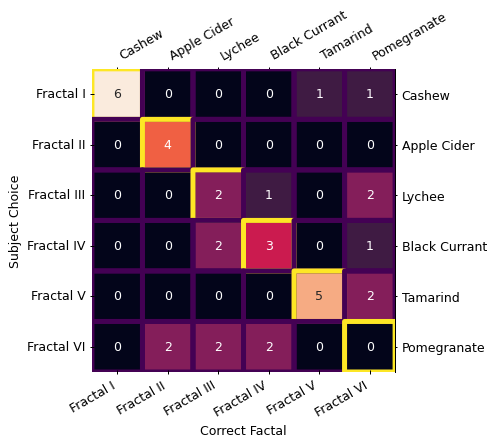

In [ ]:
Association_File_1 = 'ercffa_022_12-07-2022_11-37.json' #Change Here

#===============================================================================

Sequence_File = updateSubjectFile_Registery(Subject_code, 'sequence', Sequence_File)
Association_File_1= updateSubjectFile_Registery(Subject_code, 'association_1', Association_File_1)



AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, Association_File_1))

Sequence_1 = Sequence_Data['Association Test 1']['fractal'].tolist()
Answers_1 = AssTest_df['Fractal ID'].tolist()

flavorFractal = Sequence_Data['Flavor-Fractal pairs'].drop(columns=['Flavor_code']).to_dict(orient = 'index')
flavorFractal_code = {'Fractal {}'.format(key):flavorFractal[key]['Flavor'] for key, value in flavorFractal.items()}

reportAndConfusionMatrix(Sequence_1, Answers_1, flavorFractal_code)
plt.tight_layout()
plt.savefig('{}/confusionMatrix_{}_association_1.png'.format(subjectFigures_folder, Subject_code))

## Association Test 2

In [ ]:
printFiles(sequenceFolder, AssTestFolder, Subject_code)

Sequence Files for subject ercffa_022:
	- ercffa_022_12-07-2022_09-41.npy


Association Test Files for subject ercffa_022:
	- ercffa_022_12-07-2022_11-37.json
	- ercffa_022_12-07-2022_12-40.json
	- ercffa_022_13-07-2022_09-46.json



			Accuracy: 0.8055555555555556


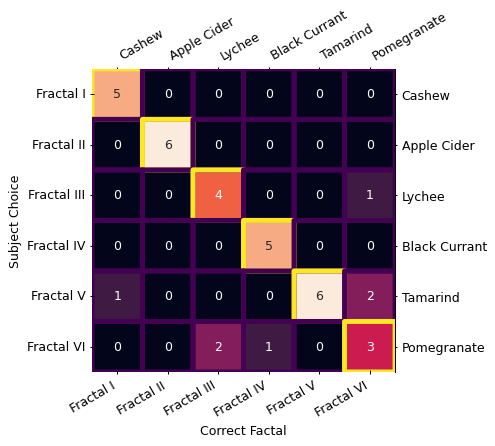

In [ ]:
Association_File_2 = 'ercffa_022_12-07-2022_12-40.json' #Change Here

#===============================================================================

Association_File_2 = updateSubjectFile_Registery(Subject_code, 'association_2', Association_File_2)
                      
AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, Association_File_2))

Sequence_2 = Sequence_Data['Association Test 2']['fractal'].tolist()
Answers_2 = AssTest_df['Fractal ID'].tolist()

reportAndConfusionMatrix(Sequence_2, Answers_2, flavorFractal_code)
plt.tight_layout()
plt.savefig('{}/confusionMatrix_{}_association_2.png'.format(subjectFigures_folder, Subject_code))

## Association Test 3

In [ ]:
printFiles(sequenceFolder, AssTestFolder, Subject_code)

Sequence Files for subject ercffa_022:
	- ercffa_022_12-07-2022_09-41.npy


Association Test Files for subject ercffa_022:
	- ercffa_022_12-07-2022_11-37.json
	- ercffa_022_12-07-2022_12-40.json
	- ercffa_022_13-07-2022_09-46.json



			Accuracy: 0.6666666666666666


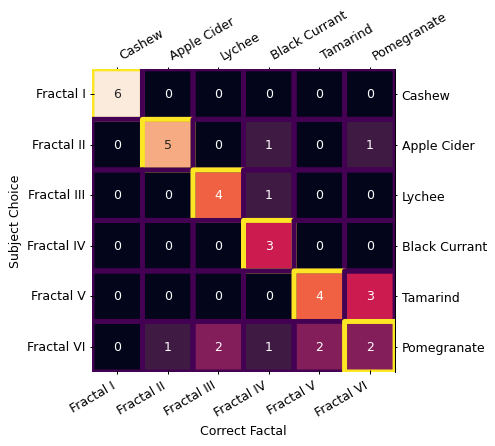

In [ ]:
Association_File_3 = 'ercffa_022_13-07-2022_09-46.json' #Change Here

#===============================================================================

Association_File_3 = updateSubjectFile_Registery(Subject_code, 'association_3', Association_File_3)
                        
AssTest_df = pd.read_json('{}/{}'.format(AssTestFolder, Association_File_3))

Sequence_3 = Sequence_Data['Association Test 3']['fractal'].tolist()
Answers_3 = AssTest_df['Fractal ID'].tolist()

reportAndConfusionMatrix(Sequence_3, Answers_3, flavorFractal_code)
plt.tight_layout()
plt.savefig('{}/confusionMatrix_{}_association_3.png'.format(subjectFigures_folder, Subject_code))